In [117]:
import numpy as np
import collections
import matplotlib.pyplot as plt

In [229]:
t_slot = 500 / 1000

###
### Below we have implemented the probabilistic model for collisions using a reverse-exponential distribution
### 

# possible_n_transmissions = [1] + list(range(5, 55, 5)) # This value represents the number of simultaneous transmissions, similar to number of nodes
possible_n_transmissions = [20]

# num_slots = 12
alpha = 0.2

for num_slots in [11]:
    print(f"Num slots:{num_slots}")
    t_max = num_slots * t_slot

    # Select samples from an exponential distribution
    mean = t_max * alpha
    
    for n_transmissions in possible_n_transmissions:
        num_collisions = [0 for _ in range(num_slots)]
        slot_counts = [0 for _ in range(num_slots)]
        num_colliding_nodes = 0
        num_colliding_nodes_elastic = 0
        
        n_iters = 500
        for _ in range(n_iters):
            samples = np.random.exponential(mean, n_transmissions)
            # print(samples)
            # print("Max before clamping", max(samples))

            # Since samples can be out of bounds i.e. greater than the last slot we need to clamp it
            samples = np.clip(samples, 0, t_max)
            # print("Max after clamping", max(samples))

            # plt.hist(samples, bins=num_slots)
            # plt.show()

            # We want a reverse-exponential distribution so that successful transmissions are first
            samples = t_max - samples
            # print(samples)

            # Clamp samples to the nearest bottom slot
            samples = t_slot * np.floor(samples / t_slot)
            # print(samples)
            # print(set(samples))

            # Pick slot number
            slots = samples / t_slot # slots transmissions picked
            # print(set(slots))
            
            slot_collisions = [0 for _ in range(num_slots)]
            # Figure out which slots had collisions
            for slot in slots:
                slot = int(slot)
                slot_collisions[slot] = slot_collisions[slot] + 1
                slot_counts[slot] = slot_counts[slot] + 1
            
            for index, slot in enumerate(slot_collisions):
                if slot > 1:
                    num_collisions[index] = num_collisions[index] + 1
                    num_colliding_nodes += slot
                    if index < 9:
                        num_colliding_nodes_elastic += slot

        num_collisions = np.array(num_collisions) / n_iters
        slot_counts = np.array(slot_counts)
        
        p_collision = num_colliding_nodes / (n_iters * n_transmissions)
        p_collision_elastic = num_colliding_nodes_elastic / (n_iters * n_transmissions)

        print(f"n_trans={n_transmissions}", p_collision, p_collision_elastic, num_collisions, slot_counts)
        
    print("")

Num slots:11
n_trans=20 0.8918 0.3019 [0.026 0.002 0.014 0.036 0.068 0.162 0.344 0.586 0.834 0.97  0.998] [ 118   58   95  149  222  376  594  964 1513 2323 3588]


[96, 55, 108, 130, 250, 369, 594, 920, 1481, 2375, 3622]


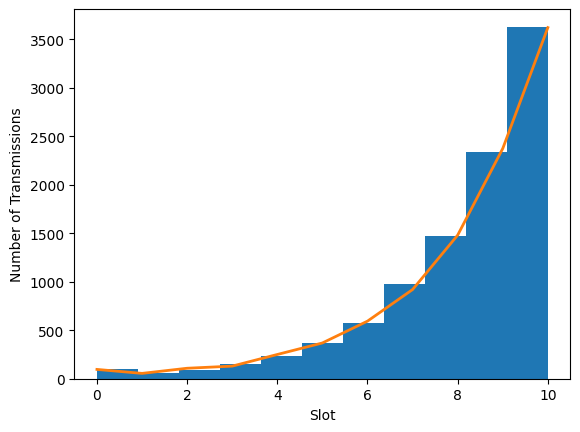

[1045, 241, 309, 403, 497, 682, 849, 1005, 1318, 1594, 2057]


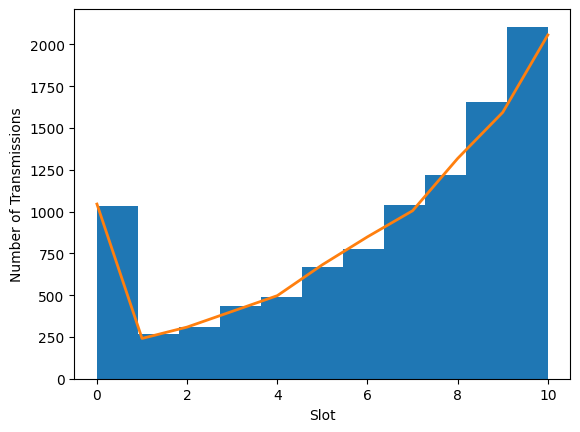

In [158]:
t_slot = 500 / 1000

num_slots = 11

n_transmissions = 10_000

for alpha in [0.2, 0.4]:
    t_max = num_slots * t_slot

    # Select samples from an exponential distribution
    mean = t_max * alpha
    
    samples = np.random.exponential(mean, n_transmissions)
    # print(samples)
    # print("Max before clamping", max(samples))

    # Since samples can be out of bounds i.e. greater than the last slot we need to clamp it
    samples = np.clip(samples, 0, t_max)
    # print("Max after clamping", max(samples))

    # We want a reverse-exponential distribution so that successful transmissions are first
    samples = t_max - samples
    # print(samples)

    # Clamp samples to the nearest bottom slot
    samples = t_slot * np.floor(samples / t_slot)
    # print(samples)
    # print(set(samples))

    # Pick slot number
    slots = samples / t_slot # slots transmissions picked

    plt.hist(slots, bins=num_slots)
    
    ################

    samples = np.random.exponential(mean, n_transmissions)
    # print(samples)
    # print("Max before clamping", max(samples))

    # Since samples can be out of bounds i.e. greater than the last slot we need to clamp it
    samples = np.clip(samples, 0, t_max)
    # print("Max after clamping", max(samples))

    # We want a reverse-exponential distribution so that successful transmissions are first
    samples = t_max - samples
    # print(samples)

    # Clamp samples to the nearest bottom slot
    samples = t_slot * np.floor(samples / t_slot)
    # print(samples)
    # print(set(samples))

    # Pick slot number
    slots = samples / t_slot # slots transmissions picked

    slot_collisions = [0 for _ in range(num_slots)]
    # Figure out which slots had collisions
    for slot in slots:
        slot = int(slot)
        slot_collisions[slot] = slot_collisions[slot] + 1
    print(slot_collisions)
    
    plt.plot(list(range(num_slots)), slot_collisions, linewidth=2)
    plt.xlabel("Slot")
    plt.ylabel("Number of Transmissions")
    plt.show()